In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from matplotlib import colors as mcolors
from IPython import display
#dtype = torch.cuda.FloatTensor

colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/MyDrive/Colab Notebooks/essay_works/Josue/Compute/Datasets"

/content/drive/.shortcut-targets-by-id/1QxPrUQB_XTV6AHi70qBXwu7OodDMxrML/Josue/Compute/Datasets


In [ ]:
#!ls

In [ ]:
def explor_data(url):
  #read dataset
  df = pd.read_csv(url, skiprows=15)
  #create a column Datetime
  df.rename(columns = {'YEAR' : 'year', 'MO' : 'month', 'DY' : 'day'}, inplace = True)
  # create column series datetime using year,month and day
  Date=pd.to_datetime(df[['year', 'month', 'day']])
  # Add the column Date in the data frame 
  df['Date']=Date 
  df['Date'] = pd.to_datetime(df['Date'])
  return df.head() 
  

In [ ]:
df = pd.read_csv('POWER_Point_Hourly_20200101_20210331_012d0632N_015d1805E_LST.csv', skiprows=15)
df.head()

,YEAR,MO,DY,HR,T2M,WS10M,WD10M,WS50M,WD50M,QV2M,PRECTOTCORR
0,2020,1,1,1,17.68,5.69,0.39,8.27,0.43,3.85,0.0
1,2020,1,1,2,16.86,5.64,3.10,8.17,3.18,3.85,0.0
2,2020,1,1,3,16.21,5.46,6.66,7.97,6.70,3.85,0.0
3,2020,1,1,4,15.63,5.06,9.51,7.63,9.49,3.78,0.0
4,2020,1,1,5,14.95,4.60,10.68,7.15,10.71,3.78,0.0


## I have create a column Datetime

In [ ]:
df.rename(columns = {'YEAR' : 'year', 'MO' : 'month', 'DY' : 'day'}, inplace = True)

In [ ]:
Date=pd.to_datetime(df[['year', 'month', 'day']]) # create column series datetime using year,month and day

In [ ]:
df['Date']=Date # Add the column Date in the data frame

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,year,month,day,HR,T2M,WS10M,WD10M,WS50M,WD50M,QV2M,PRECTOTCORR,Date
0,2020,1,1,1,17.68,5.69,0.39,8.27,0.43,3.85,0.0,2020-01-01
1,2020,1,1,2,16.86,5.64,3.10,8.17,3.18,3.85,0.0,2020-01-01
2,2020,1,1,3,16.21,5.46,6.66,7.97,6.70,3.85,0.0,2020-01-01
3,2020,1,1,4,15.63,5.06,9.51,7.63,9.49,3.78,0.0,2020-01-01
4,2020,1,1,5,14.95,4.60,10.68,7.15,10.71,3.78,0.0,2020-01-01


# Function to split extract a specifique year in the dataframe

In [ ]:
def extract_year(df,yr):
  df1=df.loc[df['year']==yr]
  return df1

# Extraction of year 2020 and 2021

In [ ]:
df_2020=extract_year(df,2020)
df_2021=extract_year(df,2021)

In [ ]:
df_2020.head()

,year,month,day,HR,T2M,WS10M,WD10M,WS50M,WD50M,QV2M,PRECTOTCORR,Date
0,2020,1,1,1,17.68,5.69,0.39,8.27,0.43,3.85,0.0,2020-01-01
1,2020,1,1,2,16.86,5.64,3.10,8.17,3.18,3.85,0.0,2020-01-01
2,2020,1,1,3,16.21,5.46,6.66,7.97,6.70,3.85,0.0,2020-01-01
3,2020,1,1,4,15.63,5.06,9.51,7.63,9.49,3.78,0.0,2020-01-01
4,2020,1,1,5,14.95,4.60,10.68,7.15,10.71,3.78,0.0,2020-01-01


In [ ]:
df_2021.head()

,year,month,day,HR,T2M,WS10M,WD10M,WS50M,WD50M,QV2M,PRECTOTCORR,Date
8783,2021,1,1,0,22.49,4.98,13.14,7.78,13.00,5.86,0.0,2021-01-01
8784,2021,1,1,1,21.30,4.96,15.44,7.45,15.57,5.68,0.0,2021-01-01
8785,2021,1,1,2,20.33,4.90,17.63,7.25,17.83,5.62,0.0,2021-01-01
8786,2021,1,1,3,19.56,4.75,19.93,7.07,20.24,5.55,0.0,2021-01-01
8787,2021,1,1,4,18.97,4.53,23.25,6.89,23.51,5.55,0.0,2021-01-01


# Split each year 2020 in to rainy and dry season



In [ ]:
rainy_2020=df_2020.loc[(df_2020['Date'].between('2020-05-01','2020-10-31'))]
dry_2020=df_2020.loc[(df_2020['Date'].between('2020-01-01','2020-04-30')) | (df_2020['Date'].between('2020-11-01','2020-12-31'))]

In [ ]:
rainy_2020.head()

,year,month,day,HR,T2M,WS10M,WD10M,WS50M,WD50M,QV2M,PRECTOTCORR,Date
2903,2020,5,1,0,34.17,4.40,222.27,6.21,221.84,13.49,0.0,2020-05-01
2904,2020,5,1,1,33.28,5.07,234.28,7.04,234.03,15.20,0.0,2020-05-01
2905,2020,5,1,2,32.51,5.74,243.12,7.23,242.74,16.30,0.0,2020-05-01
2906,2020,5,1,3,31.76,5.74,245.67,7.13,245.40,16.72,0.0,2020-05-01
2907,2020,5,1,4,31.10,5.21,242.47,6.54,242.46,16.85,0.0,2020-05-01


In [ ]:
dry_2020.head()

,year,month,day,HR,T2M,WS10M,WD10M,WS50M,WD50M,QV2M,PRECTOTCORR,Date
0,2020,1,1,1,17.68,5.69,0.39,8.27,0.43,3.85,0.0,2020-01-01
1,2020,1,1,2,16.86,5.64,3.10,8.17,3.18,3.85,0.0,2020-01-01
2,2020,1,1,3,16.21,5.46,6.66,7.97,6.70,3.85,0.0,2020-01-01
3,2020,1,1,4,15.63,5.06,9.51,7.63,9.49,3.78,0.0,2020-01-01
4,2020,1,1,5,14.95,4.60,10.68,7.15,10.71,3.78,0.0,2020-01-01


# I read now rainy 2020 for further exploration

In [ ]:
df = pd.read_csv('rainy_2020.csv') # save dataset
df.head()

,year,month,day,HR,T2M,WS10M,WD10M,WS50M,WD50M,QV2M,PRECTOTCORR,Date
0,2020,5,1,0,34.17,4.40,222.27,6.21,221.84,13.49,0.0,2020-05-01
1,2020,5,1,1,33.28,5.07,234.28,7.04,234.03,15.20,0.0,2020-05-01
2,2020,5,1,2,32.51,5.74,243.12,7.23,242.74,16.30,0.0,2020-05-01
3,2020,5,1,3,31.76,5.74,245.67,7.13,245.40,16.72,0.0,2020-05-01
4,2020,5,1,4,31.10,5.21,242.47,6.54,242.46,16.85,0.0,2020-05-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4416 entries, 0 to 4415
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         4416 non-null   int64  
 1   month        4416 non-null   int64  
 2   day          4416 non-null   int64  
 3   HR           4416 non-null   int64  
 4   T2M          4416 non-null   float64
 5   WS10M        4416 non-null   float64
 6   WD10M        4416 non-null   float64
 7   WS50M        4416 non-null   float64
 8   WD50M        4416 non-null   float64
 9   QV2M         4416 non-null   float64
 10  PRECTOTCORR  4416 non-null   float64
 11  Date         4416 non-null   object 
dtypes: float64(7), int64(4), object(1)
memory usage: 414.1+ KB


# Here I convert the column our in to datetime format

In [ ]:
df['HR']= pd.to_datetime(df['HR'], format='%H').dt.time # convert Hour column in to hour,minute and seconde
df.head()

,year,month,day,HR,T2M,WS10M,WD10M,WS50M,WD50M,QV2M,PRECTOTCORR,Date
0,2020,5,1,00:00:00,34.17,4.40,222.27,6.21,221.84,13.49,0.0,2020-05-01
1,2020,5,1,01:00:00,33.28,5.07,234.28,7.04,234.03,15.20,0.0,2020-05-01
2,2020,5,1,02:00:00,32.51,5.74,243.12,7.23,242.74,16.30,0.0,2020-05-01
3,2020,5,1,03:00:00,31.76,5.74,245.67,7.13,245.40,16.72,0.0,2020-05-01
4,2020,5,1,04:00:00,31.10,5.21,242.47,6.54,242.46,16.85,0.0,2020-05-01


# Here is the concatenation of the date and time in one format

In [ ]:
df['date_time'] = pd.to_datetime(df['Date'].astype(str) + " "+ df['HR'].astype(str), format='%Y-%m-%d %H:%M:%S') # Convert Date and Hour into year,month,day,hour,minute and seconde format
df.head()

,year,month,day,HR,T2M,WS10M,WD10M,WS50M,WD50M,QV2M,PRECTOTCORR,Date,date_time
0,2020,5,1,00:00:00,34.17,4.40,222.27,6.21,221.84,13.49,0.0,2020-05-01,2020-05-01 00:00:00
1,2020,5,1,01:00:00,33.28,5.07,234.28,7.04,234.03,15.20,0.0,2020-05-01,2020-05-01 01:00:00
2,2020,5,1,02:00:00,32.51,5.74,243.12,7.23,242.74,16.30,0.0,2020-05-01,2020-05-01 02:00:00
3,2020,5,1,03:00:00,31.76,5.74,245.67,7.13,245.40,16.72,0.0,2020-05-01,2020-05-01 03:00:00
4,2020,5,1,04:00:00,31.10,5.21,242.47,6.54,242.46,16.85,0.0,2020-05-01,2020-05-01 04:00:00


# Simple plot of Temperature

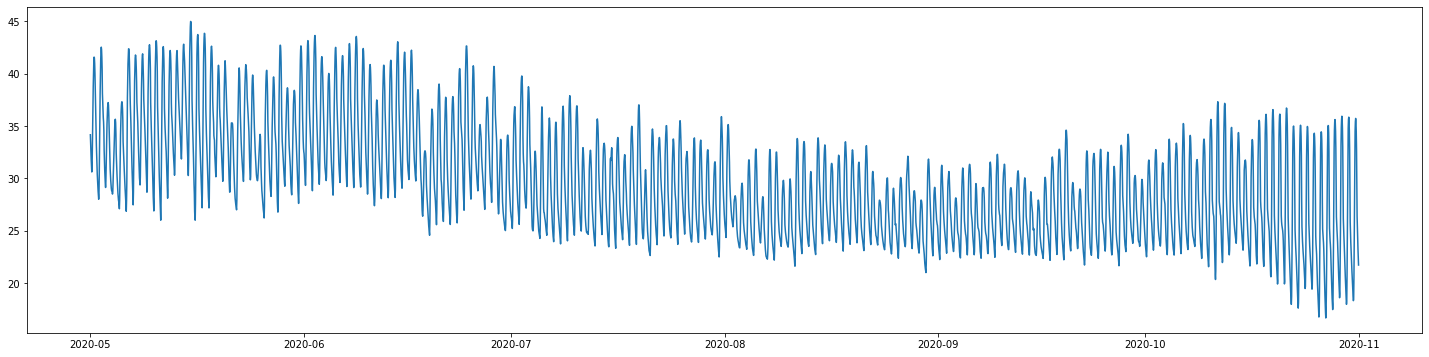

In [ ]:
plt.figure(figsize = (25,6))
plt.plot(df['date_time'], df['T2M'])
  

# Function to create a wind vector

In [ ]:
def WindVector_Creation(df, col_a ,col_b):
    #here , WS is col_a and WD is col_b
    df_col_aX = df[col_a]*np.cos(df[col_b]*np.pi / 180)
    df_col_aY = df[col_a]*np.sin(df[col_b]*np.pi / 180)
    return df_col_aX , df_col_aY

In [ ]:
df['ws_10m_x'] , df['ws_10m_y'] = WindVector_Creation(df, 'WS10M','WD10M')

In [ ]:
df['ws_50m_x'] , df['ws_50m_y'] = WindVector_Creation(df, 'WS50M','WD50M')

In [ ]:
df.head()

,year,month,day,HR,T2M,WS10M,WD10M,WS50M,WD50M,QV2M,PRECTOTCORR,Date,date_time,ws_10m_x,ws_10m_y,ws_50m_x,ws_50m_y
0,2020,5,1,00:00:00,34.17,4.40,222.27,6.21,221.84,13.49,0.0,2020-05-01,2020-05-01 00:00:00,-3.255927,-2.959551,-4.626515,-4.142398
1,2020,5,1,01:00:00,33.28,5.07,234.28,7.04,234.03,15.20,0.0,2020-05-01,2020-05-01 01:00:00,-2.959991,-4.116231,-4.135025,-5.697646
2,2020,5,1,02:00:00,32.51,5.74,243.12,7.23,242.74,16.30,0.0,2020-05-01,2020-05-01 02:00:00,-2.595188,-5.119824,-3.311550,-6.427016
3,2020,5,1,03:00:00,31.76,5.74,245.67,7.13,245.40,16.72,0.0,2020-05-01,2020-05-01 03:00:00,-2.364831,-5.230217,-2.968082,-6.482853
4,2020,5,1,04:00:00,31.10,5.21,242.47,6.54,242.46,16.85,0.0,2020-05-01,2020-05-01 04:00:00,-2.408130,-4.620066,-3.023885,-5.798941


# Function to normalize our data

In [ ]:
def ReScale(data, a):
    data_avg = data.mean()
    scaled_data = a*(data - data_avg)
    return scaled_data 

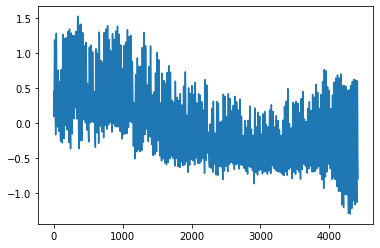

In [ ]:
plt.plot( ReScale(df['T2M'], 1/10))

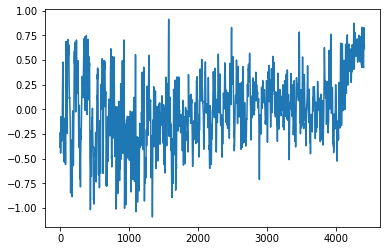

In [ ]:
plt.plot( ReScale(df['ws_10m_x'], 1/6))

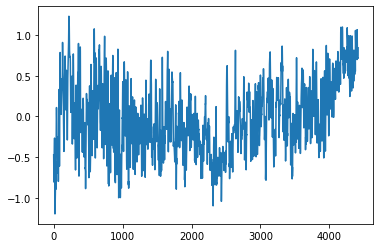

In [ ]:
plt.plot(ReScale(df['ws_50m_y'], 1/7))

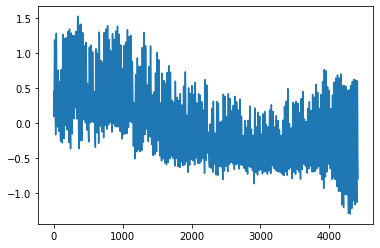

In [ ]:
plt.plot( ReScale(df['T2M'], 1/10))

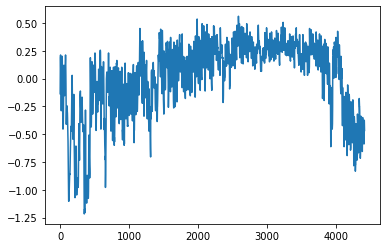

In [ ]:
plt.plot( ReScale(df['QV2M'], 1/10))	

In [ ]:
df['ws_10m_x'] = ReScale(df['ws_10m_x'], 1/6)
df['ws_10m_y'] = ReScale(df['ws_10m_y'], 1/6)

In [ ]:
df['ws_50m_x'] = ReScale(df['ws_50m_x'], 1/7)
df['ws_50m_y'] = ReScale(df['ws_50m_y'], 1/7)

In [ ]:
 df['T2M'] = ReScale(df['T2M'], 1/10)

In [ ]:
 df['QV2M'] = ReScale(df['QV2M'], 1/10)

In [ ]:
df.head()

,year,month,day,HR,T2M,WS10M,WD10M,WS50M,WD50M,QV2M,PRECTOTCORR,Date,date_time,ws_10m_x,ws_10m_y,ws_50m_x,ws_50m_y
0,2020,5,1,00:00:00,0.444664,4.40,222.27,6.21,221.84,-0.136636,0.0,2020-05-01,2020-05-01 00:00:00,-0.385475,-0.387715,-0.469644,-0.470157
1,2020,5,1,01:00:00,0.355664,5.07,234.28,7.04,234.03,0.034364,0.0,2020-05-01,2020-05-01 01:00:00,-0.336153,-0.580495,-0.399431,-0.692335
2,2020,5,1,02:00:00,0.278664,5.74,243.12,7.23,242.74,0.144364,0.0,2020-05-01,2020-05-01 02:00:00,-0.275352,-0.747761,-0.281792,-0.796531
3,2020,5,1,03:00:00,0.203664,5.74,245.67,7.13,245.40,0.186364,0.0,2020-05-01,2020-05-01 03:00:00,-0.236959,-0.766159,-0.232725,-0.804508
4,2020,5,1,04:00:00,0.137664,5.21,242.47,6.54,242.46,0.199364,0.0,2020-05-01,2020-05-01 04:00:00,-0.244176,-0.664468,-0.240697,-0.706806


# Now we save our normalized data

In [ ]:
df2  = df [['date_time' ,'month', 'T2M' ,'QV2M'  , 'ws_10m_x', 'ws_10m_y','ws_50m_x', 'ws_50m_y' ]]
df2.to_csv('rainy2020_edited.csv' , index=False)

In [ ]:
df.to_csv('rainy_2020_edited.csv' , index= False)

In [ ]:
df2.head()

,date_time,month,T2M,QV2M,ws_10m_x,ws_10m_y,ws_50m_x,ws_50m_y
0,2020-05-01 00:00:00,5,0.444664,-0.136636,-0.385475,-0.387715,-0.469644,-0.470157
1,2020-05-01 01:00:00,5,0.355664,0.034364,-0.336153,-0.580495,-0.399431,-0.692335
2,2020-05-01 02:00:00,5,0.278664,0.144364,-0.275352,-0.747761,-0.281792,-0.796531
3,2020-05-01 03:00:00,5,0.203664,0.186364,-0.236959,-0.766159,-0.232725,-0.804508
4,2020-05-01 04:00:00,5,0.137664,0.199364,-0.244176,-0.664468,-0.240697,-0.706806


# Function to extract a given specific range of date in the data

In [ ]:
def labeling_seasons( df_new , start_date , end_date):
    after_start_date = df_new["date_time"] >= start_date
    before_end_date = df_new["date_time"] <= end_date
    between_two_dates = after_start_date & before_end_date
    #filtered_dates = df_new.loc[between_two_dates]
    return between_two_dates

In [ ]:
start_date = "2020-05-01"
end_date = "2020-06-30"     
df_may = df2[labeling_seasons( df2 , start_date , end_date)]
df_may.head()

,date_time,month,T2M,QV2M,ws_10m_x,ws_10m_y,ws_50m_x,ws_50m_y
0,2020-05-01 00:00:00,5,0.444664,-0.136636,-0.385475,-0.387715,-0.469644,-0.470157
1,2020-05-01 01:00:00,5,0.355664,0.034364,-0.336153,-0.580495,-0.399431,-0.692335
2,2020-05-01 02:00:00,5,0.278664,0.144364,-0.275352,-0.747761,-0.281792,-0.796531
3,2020-05-01 03:00:00,5,0.203664,0.186364,-0.236959,-0.766159,-0.232725,-0.804508
4,2020-05-01 04:00:00,5,0.137664,0.199364,-0.244176,-0.664468,-0.240697,-0.706806


#Here is the overview of all the variables in the data

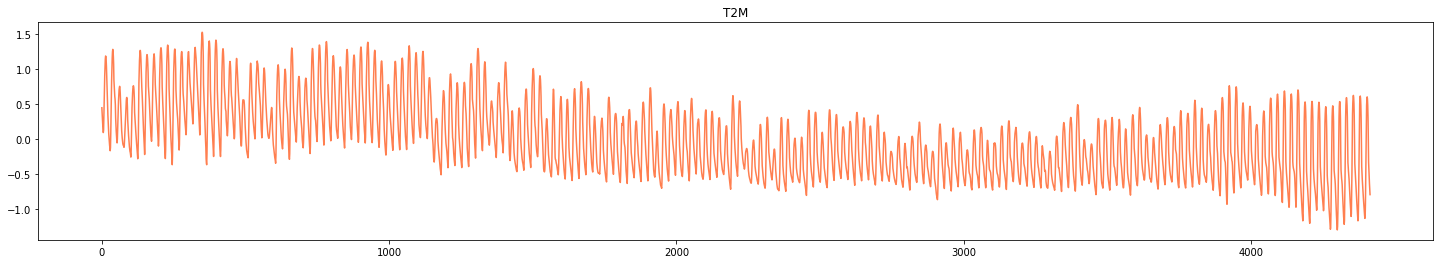

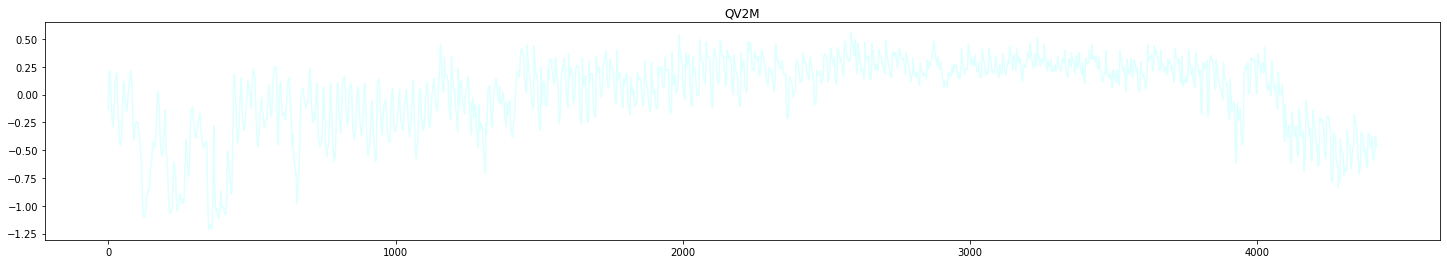

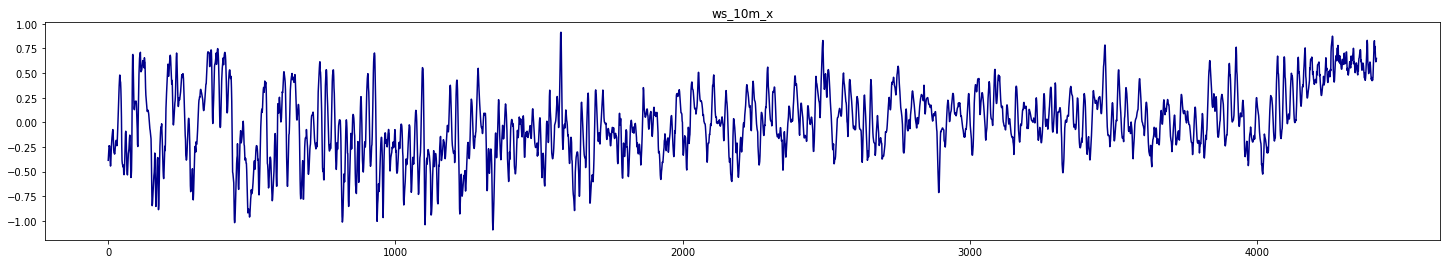

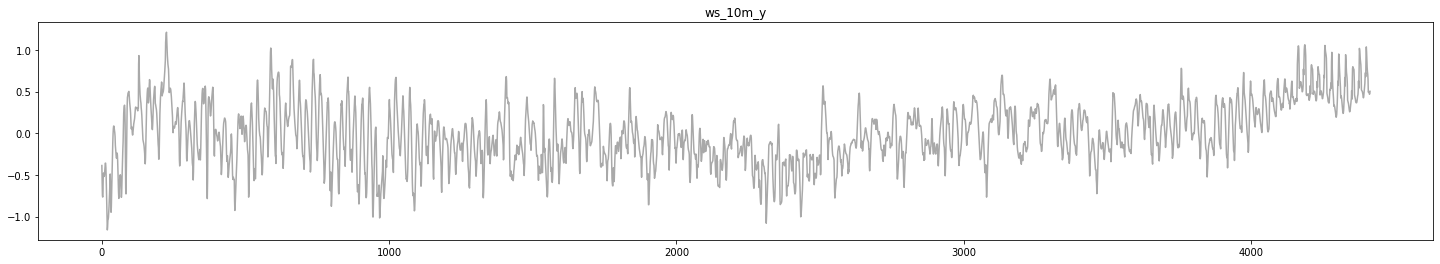

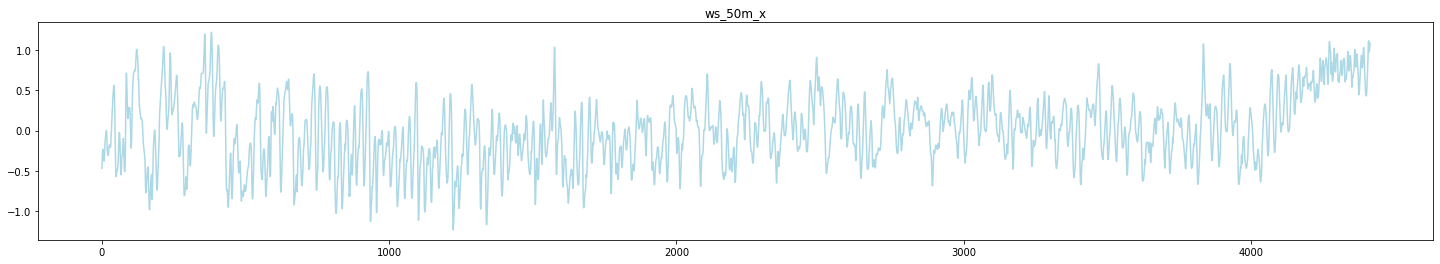

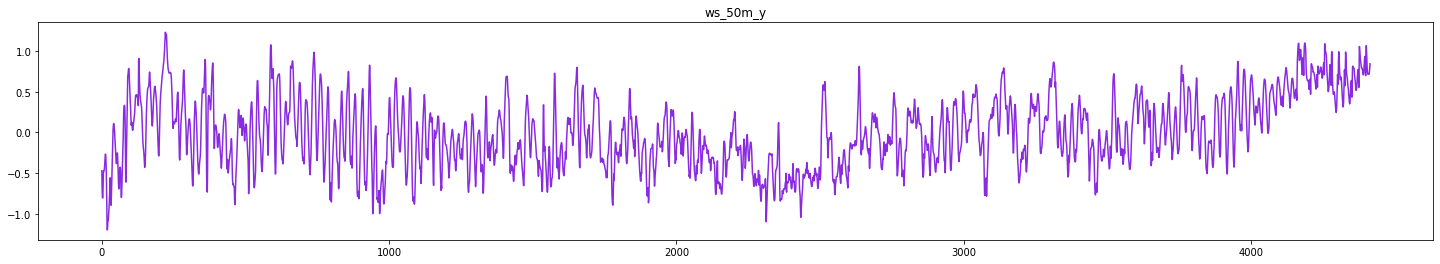

In [ ]:
for col in df2.columns[2:]:
    plt.figure(figsize=(25,4))
    plt.plot( df2[col], color=colors[np.random.randint(1,100,1)[0]])
    plt.title(col)

In [ ]:
#plt.figure(figsize =  (25,6))
#plt.plot( df2[df2['month'] == 6]['date_time'], df2[df2['month'] == 6]['T2M'])

# Monthly plot

In [ ]:
def plot_monthly( df2 , month , var):
  plt.figure(figsize =  (25,6))
  plt.plot( df2[df2['month'] == month]['date_time'], df2[df2['month'] == month ][var])
  plt.title('month num_' + str(month) + " of "+ var )
  return plt.show()

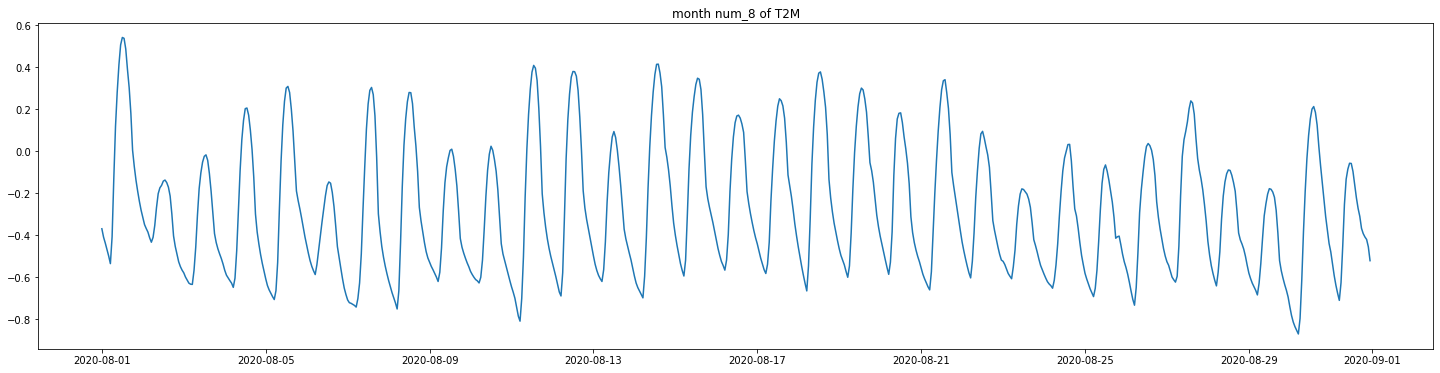

In [ ]:
plot_monthly(df2 , 8 , 'T2M' )

In [ ]:
df2.month.unique()

array([ 5,  6,  7,  8,  9, 10])

In [ ]:
df_2020.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

# Monthly average plot

In [ ]:
def  Monthly_avg( df , var):
  list_ = []
  for month_num in df.month.unique():
    list_.append(df[ df['month'] ==  month_num][var].mean())
  return list_

In [ ]:
list_t2m_avg =Monthly_avg(df_2020 , 'T2M')


Text(0.5, 1.0, 'monthly avg rainy season of T2M')

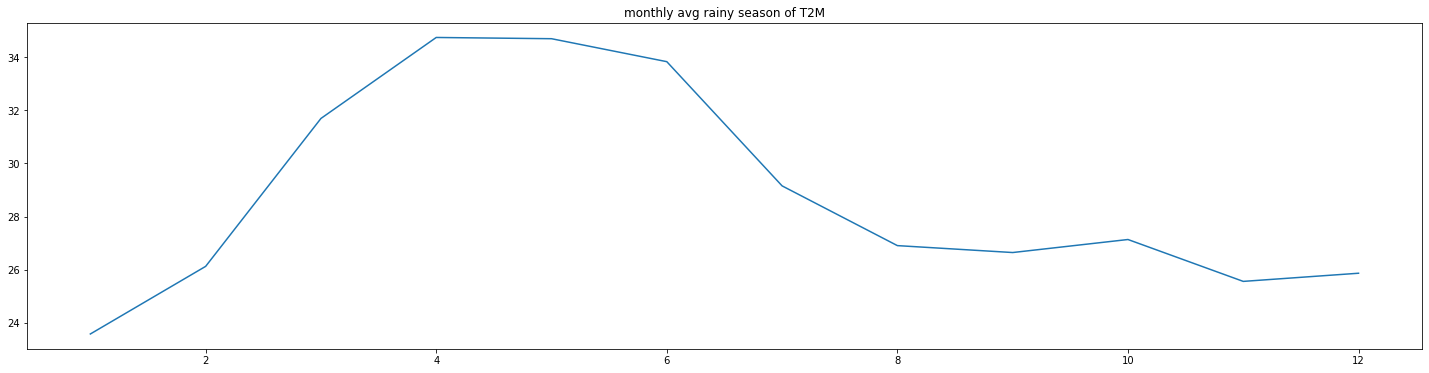

In [ ]:
plt.figure(figsize =  (25,6))
plt.plot(df_2020.month.unique() , list_t2m_avg)
plt.title("monthly avg rainy season of T2M")

# Decomposition of variable in to trend, seasonal and noise

In [ ]:
df2=df2.groupby('date_time').sum()
df2.head()

,month,T2M,QV2M,ws_10m_x,ws_10m_y,ws_50m_x,ws_50m_y
date_time,,,,,,,
2020-05-01 00:00:00,5,0.444664,-0.136636,-0.385475,-0.387715,-0.469644,-0.470157
2020-05-01 01:00:00,5,0.355664,0.034364,-0.336153,-0.580495,-0.399431,-0.692335
2020-05-01 02:00:00,5,0.278664,0.144364,-0.275352,-0.747761,-0.281792,-0.796531
2020-05-01 03:00:00,5,0.203664,0.186364,-0.236959,-0.766159,-0.232725,-0.804508
2020-05-01 04:00:00,5,0.137664,0.199364,-0.244176,-0.664468,-0.240697,-0.706806


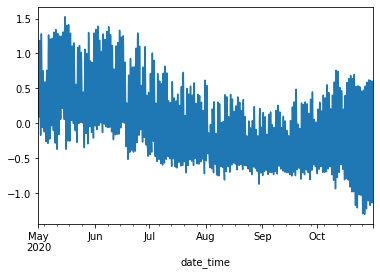

In [ ]:
df2['T2M'].plot()

date_time
2020-05-01 00:00:00   NaN
2020-05-01 01:00:00   NaN
2020-05-01 02:00:00   NaN
2020-05-01 03:00:00   NaN
2020-05-01 04:00:00   NaN
                       ..
2020-10-31 19:00:00   NaN
2020-10-31 20:00:00   NaN
2020-10-31 21:00:00   NaN
2020-10-31 22:00:00   NaN
2020-10-31 23:00:00   NaN
Name: trend, Length: 4416, dtype: float64
date_time
2020-05-01 00:00:00   -0.302393
2020-05-01 01:00:00   -0.356863
2020-05-01 02:00:00   -0.405956
2020-05-01 03:00:00   -0.449355
2020-05-01 04:00:00   -0.486712
                         ...   
2020-10-31 19:00:00   -0.007338
2020-10-31 20:00:00   -0.069201
2020-10-31 21:00:00   -0.128728
2020-10-31 22:00:00   -0.188036
2020-10-31 23:00:00   -0.245720
Name: seasonal, Length: 4416, dtype: float64
date_time
2020-05-01 00:00:00   NaN
2020-05-01 01:00:00   NaN
2020-05-01 02:00:00   NaN
2020-05-01 03:00:00   NaN
2020-05-01 04:00:00   NaN
                       ..
2020-10-31 19:00:00   NaN
2020-10-31 20:00:00   NaN
2020-10-31 21:00:00   NaN
2020-10-31 

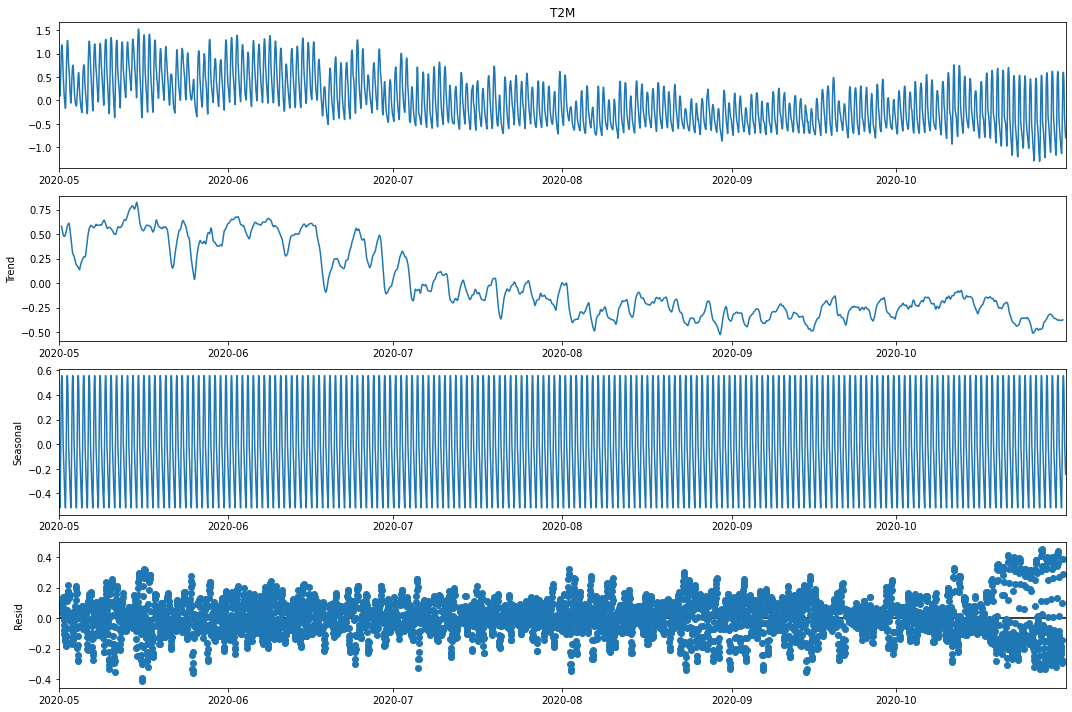

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
plt.rcParams["figure.figsize"] = (15,10)
series = df2['T2M']
series2=series[:365]
result = seasonal_decompose(series, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)
result.plot();
pyplot.show()

# Save each decomposed part in the variable

In [ ]:
df_trend=result.trend
df_seasonal=result.seasonal
df_noise=result.resid

# Check for missing value

In [ ]:
df_trend.isna().sum()

24

In [ ]:
df_seasonal.isna().sum()

0

In [ ]:
df_noise.isna().sum()

24

# Drop missing value

In [ ]:
df_trend=df_trend.dropna()
df_seasonal=df_seasonal.dropna()
df_noise=df_noise.dropna()

In [ ]:
df_trend=df_trend.to_frame()
df_trend.head()

,trend
date_time,
2020-05-01 12:00:00,0.579643
2020-05-01 13:00:00,0.564581
2020-05-01 14:00:00,0.550518
2020-05-01 15:00:00,0.537498
2020-05-01 16:00:00,0.525602


# Now let's build ARIMA model

## Before build ARIMA, let's check if the time series is stationnary or not

In [ ]:
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(df_trend.trend)
print('ADF Statistic: %f' % ADF_result[0])
print('p-value: %f' % ADF_result[1])

ADF Statistic: -2.339430
p-value: 0.159566


We can see that the p-value is greater than 0.05, so our data is not stationary.

So let use Auto ARIMA to find the right value of p,d and q

In [ ]:
#pip install pmdarima

In [ ]:
from pmdarima import auto_arima

In [ ]:
pq = []
#for name, column in df2[[ 'T2M']].iteritems():

print(f'Searching order of p and q for : ')
stepwise_model = auto_arima(df_trend['trend'],start_p=1, start_q=1,max_p=7, max_q=7, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)
parameter = stepwise_model.get_params().get('order')
print(f'optimal order for trend: is: {parameter} \n\n')
pq.append(stepwise_model.get_params().get('order'))

Searching order of p and q for : 
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-43655.904, Time=5.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-30444.459, Time=0.95 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-43697.255, Time=3.81 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.96 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-30442.827, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-48507.581, Time=2.67 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-49959.163, Time=2.30 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-50608.828, Time=4.90 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-50913.162, Time=4.70 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=-51109.464, Time=3.99 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=-51303.988, Time=4.13 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=-48466.058, Time=32.60 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=-43709.699, Time=18.66 sec
 ARIMA(7,1,0)(0,0,0)[0]             : AIC=-5

In [ ]:
#from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
# 1,1,1 ARIMA Model
model1 = ARIMA(df_trend.trend, order=(7,1,0))
model_fit1 = model1.fit()
print(model_fit1.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                  trend   No. Observations:                 4392
Model:                 ARIMA(7, 1, 0)   Log Likelihood               25660.883
Date:                Tue, 03 May 2022   AIC                         -51305.765
Time:                        16:56:50   BIC                         -51254.667
Sample:                    05-01-2020   HQIC                        -51287.738
                         - 10-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.5966      0.010    261.536      0.000       2.577       2.616
ar.L2         -3.1330      0.029   -107.698      0.000      -3.190      -3.076
ar.L3          2.7206      0.047     58.350      0.0

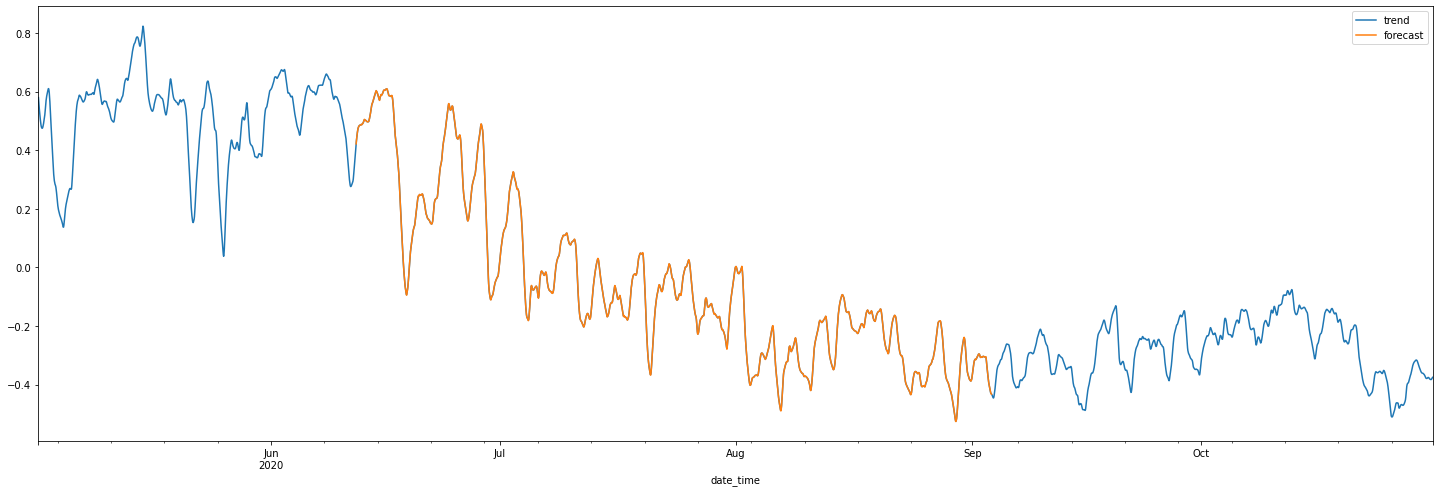

In [ ]:
df_trend['forecast']=model_fit1.predict(start=1000,end=3000,dynamic=False)
df_trend[['trend','forecast']].plot(figsize=(25,8))

# Accuracy Metrics for Time Series Forecast

Mean Absolute Percentage Error (MAPE)

Mean Error (ME)

Mean Absolute Error (MAE)

Mean Percentage Error (MPE)

Root Mean Squared Error (RMSE)

Correlation between the Actual and the Forecast (corr)

Min-Max Error (minmax)

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

forecast_accuracy(df_trend['forecast'], df_trend['trend'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing 

{'corr': nan,
 'mae': 0.00046834688648868657,
 'mape': 0.030459477588769306,
 'me': 1.0139325605878215e-05,
 'minmax': nan,
 'mpe': -0.016739051947450945,
 'rmse': 0.0006603358270042798}

# RNN-LSTM

In [ ]:
import numpy as np
from numpy import array
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [ ]:
n_steps = 3
X, y= split_sequence(df_trend.trend.tolist(), n_steps)

In [ ]:
for i in range(len(X)):

  print(X[i], y[i])

In [ ]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps,n_features)))
#model.add(LSTM(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
X.shape

(4389, 3, 1)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X, y,validation_split=0.30,epochs=40,callbacks=[early_stopping])

Epoch 1/40
96/96 [==============================] - 2s 6ms/step - loss: 0.0703 - val_loss: 0.0014
Epoch 2/40
96/96 [==============================] - 0s 4ms/step - loss: 6.3115e-04 - val_loss: 2.8257e-04


In [ ]:
model.evaluate(X,y)

138/138 [==============================] - 0s 2ms/step - loss: 3.6173e-04


0.00036172891850583255

In [ ]:
y_pred_lstm = model.predict(X)

In [ ]:
y_pred_lstm = model.predict(X)
from sklearn.metrics import mean_squared_error
from math import sqrt
mean_squared_error(y_pred_lstm , y)

0.0003617288654847109

In [ ]:
print('RMSE:',sqrt(mean_squared_error(y_pred_lstm , y)))

RMSE: 0.019019170998881913


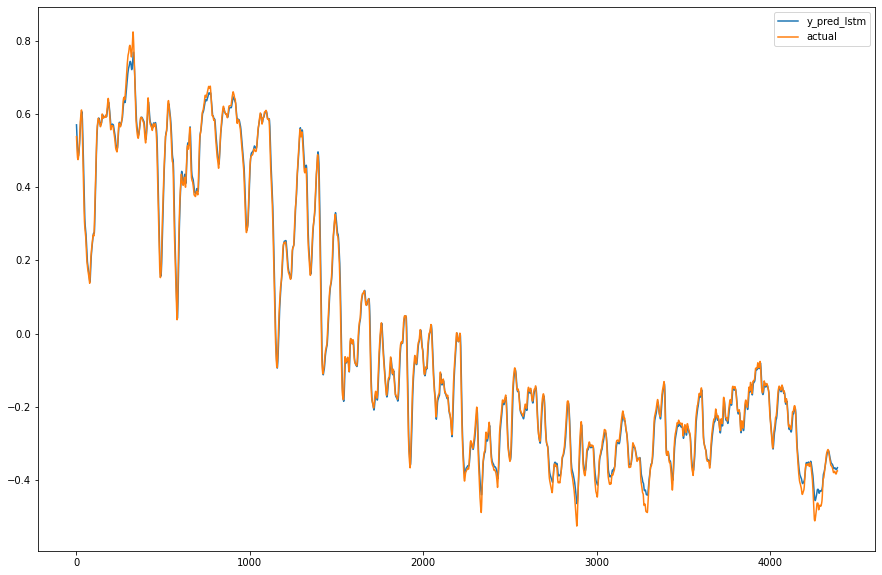

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(y_pred_lstm, label ='y_pred_lstm')
plt.plot(y,label='actual')
plt.legend(loc='upper right')
plt.show()

# Simple RNN

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN # import LSTM and SimpleRNN from keras.layers
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
model1 = Sequential()
model1.add(SimpleRNN(50, activation='relu', input_shape=(n_steps,n_features)))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.fit(X, y, validation_split=0.30,epochs=40,callbacks=[early_stopping])

Epoch 1/40
96/96 [==============================] - 1s 6ms/step - loss: 0.0258 - val_loss: 1.2312e-04
Epoch 2/40
96/96 [==============================] - 0s 3ms/step - loss: 1.7401e-04 - val_loss: 5.8827e-05


In [ ]:
y_pred_rnn = model1.predict(X)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred_rnn , y)

0.00012476995631578

In [ ]:
print('RMSE:',sqrt(mean_squared_error(y_pred_rnn , y)))

RMSE: 0.011170047283506906


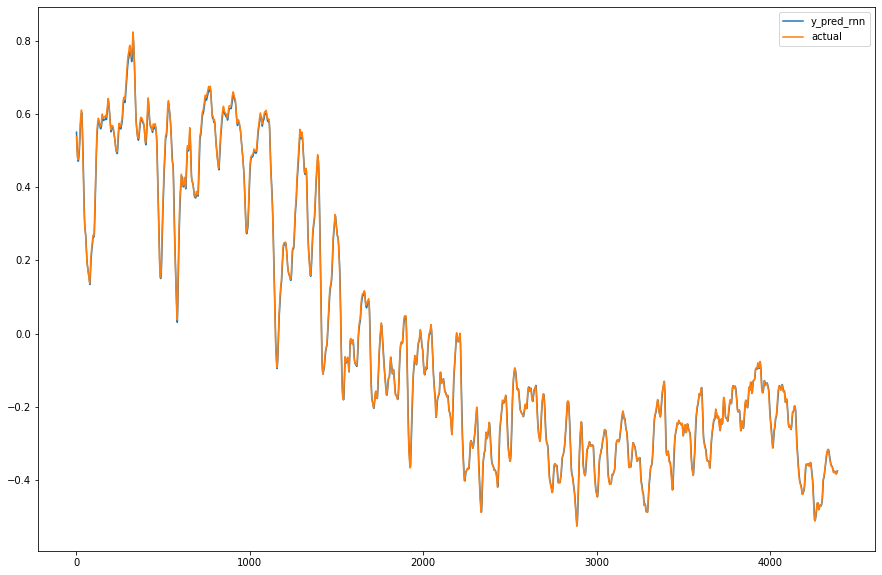

In [ ]:
plt.plot(y_pred_rnn, label ='y_pred_rnn')
plt.plot(y, label ='actual')
plt.legend(loc='upper right')
plt.show()